## HW2 | KNN Graph Instruction

#### 1. Fill in all code (under # put your code here)

#### 2. Must use Pandas or Numpy if there is an instruction 

#### 3. Generate the plot that is exactly the same as the table right after each code block

#### 4. Answer the question at the end of this jupyter notebook


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

## Swiss Banknote Dataset

Six variables measured on 100 genuine and 100 counterfeit old Swiss 1000-franc
bank notes. The data stem from Flury and Riedwyl (1988). The columns correspond
to the following one label and six variables:

0. Conterfeit - 0: genuine bank notes、1: genuine bank notes (Labels)


1. Length - Length of the bank note


2. Left - Height of the bank note, measured on the left


3. Right - Height of the bank note, measured on the right


4. Bottom - Distance of inner frame to the lower border


5. Top - Distance of inner frame to the upper border


6. Diagonal - Length of the diagonal



More details: [Kaggle | Swiss banknote conterfeit detection](https://www.kaggle.com/chrizzles/swiss-banknote-conterfeit-detection)

In [2]:
# Use [Pandas] to import data | banknotes.csv
# Put your code here 

bank = pd.read_csv("banknotes.csv")
label = bank.conterfeit

bank.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [3]:
# Use [Numpy function] to stack the following columns
# The 5-th column "Bottom" as X, the 6-th column "Top" as Y
# Put your code here
data_xy=np.array([bank.iloc[0]["Bottom"],bank.iloc[0]["Top"]])
for i in range(1,len(bank)):
    data_xy1 = np.array([bank.iloc[i]["Bottom"],bank.iloc[i]["Top"]])
    data_xy=np.vstack((data_xy,data_xy1))
data_xy

array([[ 9. ,  9.7],
       [ 8.1,  9.5],
       [ 8.7,  9.6],
       [ 7.5, 10.4],
       [10.4,  7.7],
       [ 9. , 10.1],
       [ 7.9,  9.6],
       [ 7.2, 10.7],
       [ 8.2, 11. ],
       [ 9.2, 10. ],
       [ 7.9, 11.7],
       [ 7.7, 10.5],
       [ 7.9, 10.8],
       [ 7.7, 10.9],
       [ 7.7, 10.8],
       [ 9.3,  8.5],
       [ 8.2,  9.8],
       [ 9. ,  9. ],
       [ 7.4, 11.5],
       [ 8.6, 10. ],
       [ 8.4, 10. ],
       [ 8.1, 10.3],
       [ 8.4, 10.8],
       [ 8.7, 10. ],
       [ 7.4, 10.8],
       [ 8. , 11. ],
       [ 8.9,  9.8],
       [ 9.8,  9.5],
       [ 7.4, 10.5],
       [ 8.3,  9. ],
       [ 7.9, 10.7],
       [ 8.6,  9.1],
       [ 7.7, 10.5],
       [ 8.4, 10.3],
       [ 8.9, 10.6],
       [ 9.4,  9.7],
       [ 8.4,  9.7],
       [ 7.9, 10. ],
       [ 8.5,  9.3],
       [ 8.1,  9.7],
       [ 8.9,  9.4],
       [ 8.8,  9.9],
       [ 9.3,  9. ],
       [ 9. ,  9.8],
       [ 8.2, 10.2],
       [ 8.3, 10.2],
       [ 8.3, 10.2],
       [ 7.3,

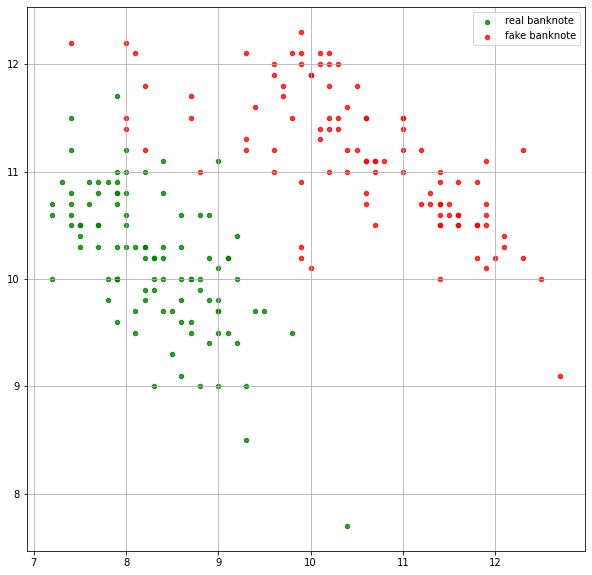

In [4]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label==0)
index_1 = np.where(label==1)

# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter 
# Remember to put on grid and legend and equal axis
# Put your code here
plt.figure(figsize = (10, 10))
plt.grid()
for i in range(len(index_0[0])):
    a=index_0[0][i]
    plt.scatter(data_xy[a][0],data_xy[a][1],c="green",s=20, alpha=0.8)
    b=index_1[0][i]
    plt.scatter(data_xy[b][0],data_xy[b][1],c="red",s=20, alpha=0.8)
plt.legend(labels=["real banknote","fake banknote"],loc="upper right")

In [5]:
# Use [Numpy function] to calculate the squared distance matrix between each points
# Put your code here
D_all=[]
for l in range(len(data_xy)):
    x=data_xy[l][0]
    y=data_xy[l][1]
    D=[]
    for i in range(len(data_xy)):
        d1=(x-data_xy[i][0])**2
        d2=(y-data_xy[i][1])**2
        D.append(d1+d2)
    D_all.append(D)
dist_sq = np.array(D_all)

In [6]:
dist_sq

array([[ 0.  ,  0.85,  0.1 , ...,  4.52,  7.09,  4.68],
       [ 0.85,  0.  ,  0.37, ...,  8.81, 12.5 ,  8.41],
       [ 0.1 ,  0.37,  0.  , ...,  5.86,  8.81,  5.86],
       ...,
       [ 4.52,  8.81,  5.86, ...,  0.  ,  0.37,  0.32],
       [ 7.09, 12.5 ,  8.81, ...,  0.37,  0.  ,  1.09],
       [ 4.68,  8.41,  5.86, ...,  0.32,  1.09,  0.  ]])

In [14]:
def nearest_partition(dist_sq, K):
    # Use [Numpy function] to return the "K Nearest Neighbor"
    # Put your code here
    k_nearest_neighbor=[]
    for i in range(len(dist_sq)):
        need_zip=[]
        need_zip.append(data_xy[i])
        dist_sq1=dist_sq[i].argsort()
        for k in range(0,K+1):
            need_zip.append(data_xy[dist_sq1[k]])
        k_nearest_neighbor.append(need_zip)
    return k_nearest_neighbor
# k_nearest_neighbor= nearest_partition(dist_sq, 3)
# k_nearest_neighbor

[[array([9. , 9.7]),
  array([9. , 9.7]),
  array([9. , 9.7]),
  array([9. , 9.8]),
  array([8.9, 9.8])],
 [array([8.1, 9.5]),
  array([8.1, 9.5]),
  array([8.1, 9.7]),
  array([7.9, 9.6]),
  array([8.2, 9.8])],
 [array([8.7, 9.6]),
  array([8.7, 9.6]),
  array([8.7, 9.5]),
  array([8.6, 9.6]),
  array([8.5, 9.7])],
 [array([ 7.5, 10.4]),
  array([ 7.5, 10.4]),
  array([ 7.5, 10.5]),
  array([ 7.5, 10.3]),
  array([ 7.5, 10.5])],
 [array([10.4,  7.7]),
  array([10.4,  7.7]),
  array([9.3, 8.5]),
  array([9.3, 9. ]),
  array([9.8, 9.5])],
 [array([ 9. , 10.1]),
  array([ 9. , 10.1]),
  array([ 9.1, 10.2]),
  array([ 8.9, 10.2]),
  array([ 9.1, 10.2])],
 [array([7.9, 9.6]),
  array([7.9, 9.6]),
  array([8.1, 9.5]),
  array([8.1, 9.7]),
  array([7.8, 9.8])],
 [array([ 7.2, 10.7]),
  array([ 7.2, 10.7]),
  array([ 7.2, 10.6]),
  array([ 7.4, 10.7]),
  array([ 7.4, 10.6])],
 [array([ 8.2, 11. ]),
  array([ 8.2, 11. ]),
  array([ 8., 11.]),
  array([ 8.2, 11.2]),
  array([ 8.4, 11.1])],
 [ar

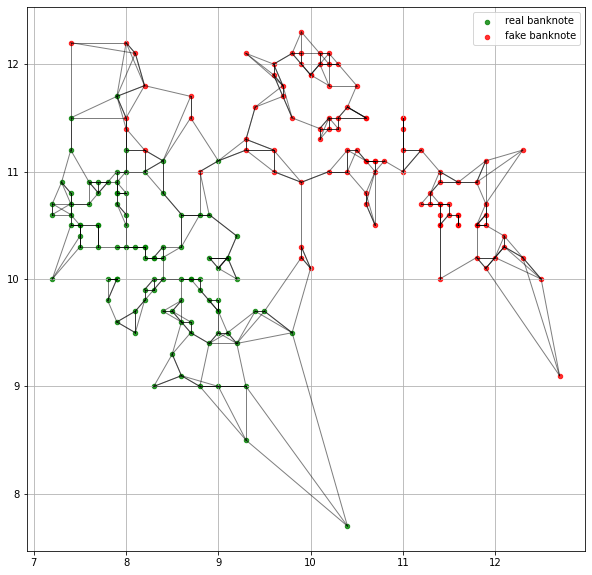

In [15]:
# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label==0)
index_1 = np.where(label==1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here

plt.figure(figsize = (10, 10))
plt.grid()
for i in range(len(index_0[0])):
    a=index_0[0][i]
    plt.scatter(data_xy[a][0],data_xy[a][1],c="green",s=20, alpha=0.8)
    b=index_1[0][i]
    plt.scatter(data_xy[b][0],data_xy[b][1],c="red",s=20, alpha=0.8)
plt.legend(labels=["real banknote","fake banknote"],loc="upper right")

        
# Draw lines from each point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put your code here

K = 3
k_nearest_neighbor= nearest_partition(dist_sq, K)
for l in range(len(k_nearest_neighbor)):
    for r in range(1,len(k_nearest_neighbor[l])):
        plt.plot(*zip(k_nearest_neighbor[l][0],k_nearest_neighbor[l][r]),color='black', linewidth=1, alpha=0.5)


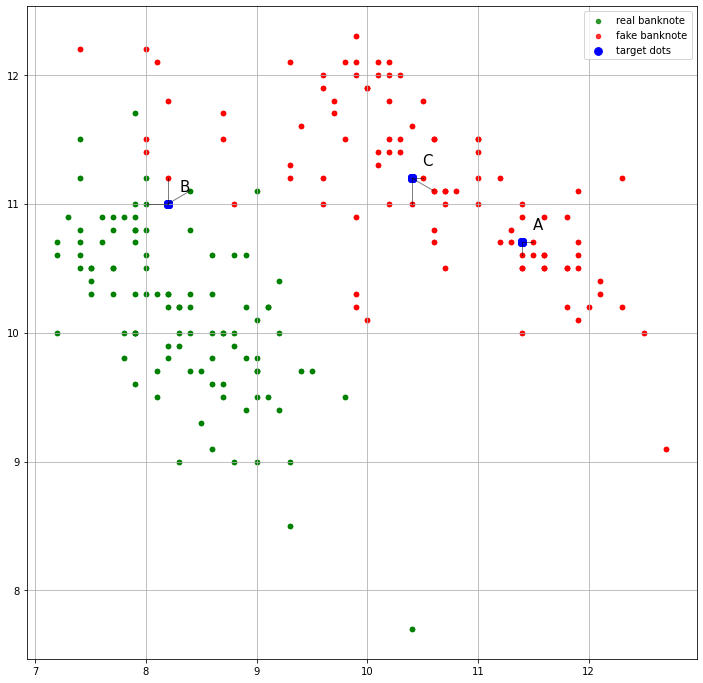

In [30]:
# Set seed = 10 | Random select three dots from data_xy
# Save dots index in varible "target" 
# Don't need to change below three lines

random.seed(10)
target = np.array([random.randint(0, len(data_xy)) for i in range(3)])
text = ['A', 'B', 'C']
# print(target)


# Use [Numpy function] to find where label = 0 / label = 1
# Put your code here

index_0 = np.where(label==0)
index_1 = np.where(label==1)


# Use data_xy to plot the scatter plot 
# Label = 0 → color = green | Label = 1 → color = red | Target → color = blue
# Fill X and Y in the plt.scatter
# Remember to put on grid and legend and equal axis
# Put your code here
plt.figure(figsize = (12, 12))
plt.grid()
for i in range(len(index_0[0])):
    for l in target:
        a=index_0[0][i]
        plt.scatter(data_xy[a][0],data_xy[a][1],c="green",s=20, alpha=0.8)
        b=index_1[0][i]
        plt.scatter(data_xy[b][0],data_xy[b][1],c="red",s=20, alpha=0.8)
        plt.scatter(data_xy[l][0],data_xy[l][1],c="blue",s=60)# Target dots
plt.legend(labels=["real banknote","fake banknote","target dots"],loc="upper right")




# Draw lines from the selected three point to its three nearest neighbors (set K=3)
# Use some zip magic to make it happen (Hint is at below cell)
# You might need loops to generate the plot below
# set parameter [color='black', linewidth=1, alpha=0.5] when you draw lines 
# Put text A, B, C on each dots (location: Right + 0.1、 Up + 0.1)
# Put your code here


K = 3
dist_target=[]
for a in target:
#     print([data_xy[a][0],data_xy[a][1]])
    dist_target.append(dist_sq[a])
dist_target=np.array(dist_target)
# print(dist_target)
k_nearest_neighbor2=[]
for i in range(len(dist_target)):
    need_zip=[]
    need_zip.append(data_xy[target[i]])
    dist_target1=dist_target[i]
    dist_target1=dist_target[i].argsort()
    for k in range(0,K+1):
        need_zip.append(data_xy[dist_target1[k]])
    k_nearest_neighbor.append(need_zip)
    k_nearest_neighbor2.append(need_zip)
# print(k_nearest_neighbor2)

for l in range(len(k_nearest_neighbor2)):
    for r in range(1,len(k_nearest_neighbor2[l])):
        plt.plot(*zip(k_nearest_neighbor2[l][0],k_nearest_neighbor2[l][r]),color='black', linewidth=1, alpha=0.5)
for a in range(len(target)):
    plt.text(data_xy[target[a]][0]+0.1,data_xy[target[a]][1]+0.1,text[a],fontsize=15)

### Question：由上圖進行判斷，回答 ABC 三點各自被 KNN 分為哪一群，並說明原因。

### Your Answer： A:紅色，因為另外兩個都是紅色。 B:綠色，因為綠色為多數。 C:紅色，因為另外三個點都是紅色

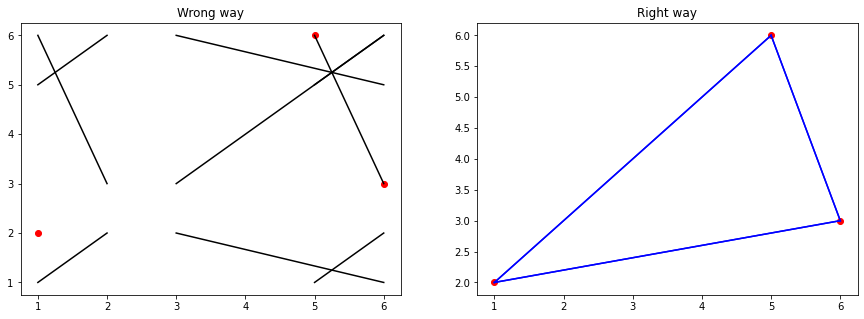

In [10]:
# Hint: How to drow a line between two dots

dots = np.array([[1, 2], [6, 3], [5, 6]])

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.title('Wrong way')        
for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(dots[i], dots[j], color = 'black')

plt.subplot(122)
plt.title('Right way')

for i in range(len(dots)):
    plt.scatter(dots[i][0], dots[i][1], color='red')

for i in range(len(dots)):
    for j in range(len(dots)):
        plt.plot(*zip(dots[i], dots[j]), color = 'blue')